## Thermal model

In this example we are using the same procedure than in the previous example but activating the thermal model.

In [1]:
from cideMOD import (
    CellParser,
    get_model_options,
    Problem,
    Trigger,
    PlotView
)

To enable the thermal module we activate the option `solve_thermal`.

In [2]:
model_options = get_model_options(model='P2D', solve_thermal=True, clean_on_exit=False,
                                  save_path = f"results/04_thermal_simulation")

Saving results to /home/fenicsx/shared/cideMOD/examples/notebooks/results/results_04_thermal_simulation


To work with the thermal model, we have to specify thermal properties of the materials. For this example we use the dataset from `Xu 2015`.

In [3]:
case = "Xu_2015"
cell = CellParser("params.json", data_path=f"../../data/data_{case}", model_options=model_options)

Negative electrode capacity: 0.101727
Positive electrode capacity: 0.169504
Cell capacity: 0.101727


In this case we are going to start the simulation at 20 ºC. We specify it using the `Problem` object.

In [4]:
problem = Problem(cell, model_options)
T = 273+20 # temperature in K
problem.set_cell_state(SoC=1, T_ext=T, T_ini=T)
problem.setup()

Building mesh for P2D problem with 5 components and 150 nodes
Finished mesh construction
Building problem setup


- Building cell parameters - Done
- Initializing state - Done   
- Build variational formulation - Done 


Finally, we perform a 1C discharge until 2.1 V or 1 h

In [5]:
C_rate = -1
I_app = C_rate * cell.ref_capacity

v_min = Trigger(2.1, 'v') # Trigger at 2.1V
status = problem.solve(min_step=10, i_app=I_app, t_f=3600, 
                       store_delay=-1, adaptive=True, triggers=[v_min]) # Perform the simulation

Voltage is 2.1 V at 58min 20s                    



Then we can visualize the results using `PlotView`

In [7]:
PlotView(problem)

or using standard python libraries like `matplotlib`

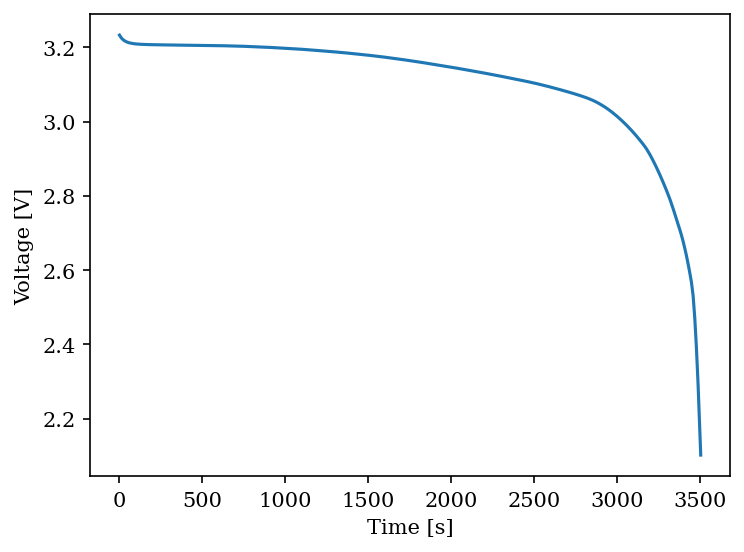

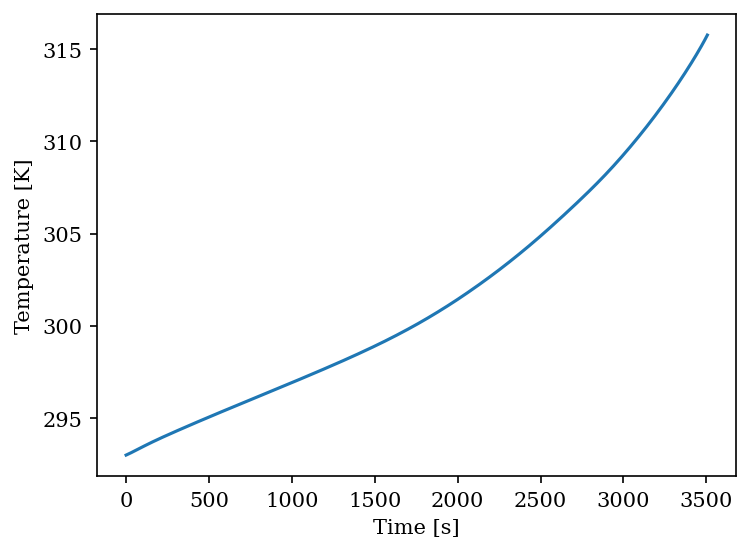

In [6]:
import matplotlib.pyplot as plt
plt.rc('font', family='serif')

# Plot voltage vs time
time = problem.get_global_variable('time')
voltage = problem.get_global_variable('voltage')
fig1, ax1 = plt.subplots(1, 1, figsize=(5.5, 4), dpi=150)
ax1.plot(time, voltage, "-", label='voltage')
ax1.set_xlabel("Time [s]")
ax1.set_ylabel("Voltage [V]")
plt.show()

# Plot temperature vs time
temperature = problem.get_global_variable('T_max')
fig1, ax1 = plt.subplots(1, 1, figsize=(5.5, 4), dpi=150)
ax1.plot(time, temperature, "-", label='temperature')
ax1.set_xlabel("Time [s]")
ax1.set_ylabel("Temperature [K]")
plt.show()